In [1]:
import numpy as np
import seaborn as sns
import plotly.express as px

from typing import Callable

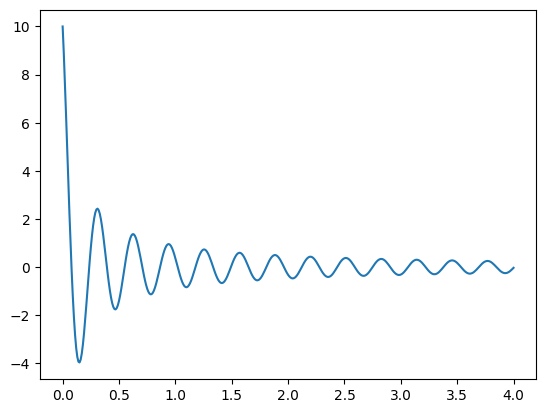

In [8]:
def target_func(x: np.ndarray) -> np.ndarray:
    return np.cos(20 * x) / (x + 0.1)


#end 4.01 as x in [0;4]
x = np.arange(0.0, 4.01, step=0.01)


def plot_graph(x: np.ndarray, func: Callable, plot_engine: str ='seaborn'):
    '''function for linear plotting
        x - np array
        func - callable object for getting y from x
        plot_engine - type of engine supported 'seaborn'- for seaborn and 'plotly' for plotly
    '''
    def seaborn_plot(x: np.ndarray, y: np.ndarray):
        sns.lineplot(x = x, y = y)

    def plotly_plot(x: np.ndarray, y: np.ndarray):
        px.line(x = x, y = y, title='y=f(x)').show()

    engines = {'seaborn': seaborn_plot, 'plotly': plotly_plot}

    if plot_engine not in engines:
        raise(ValueError(f'{plot_engine} not permitted, only {engines.keys()} are supported'))

    engines.get(plot_engine)(x, func(x))


plot_graph(x, target_func, plot_engine= 'seaborn')

In [10]:
plot_graph(x, target_func, plot_engine= 'plotly')

In [12]:
import pandas as pd
df = pd.read_csv('car_data.csv')

df.head()


,Unnamed: 0,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


<Axes: xlabel='Annual Income', ylabel='Gender'>

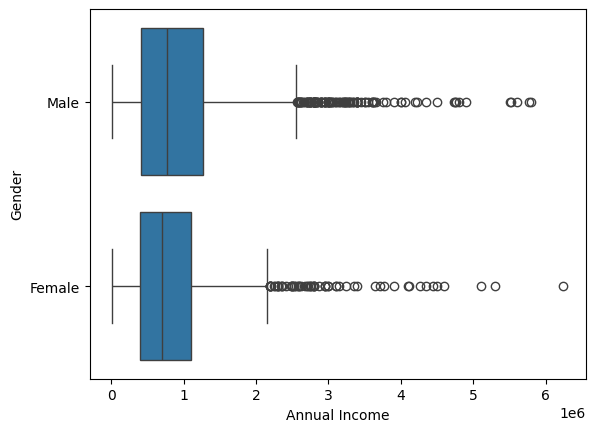

In [19]:
getattr(sns, 'boxplot')(data=df, y="Gender", x="Annual Income", orient='h')

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

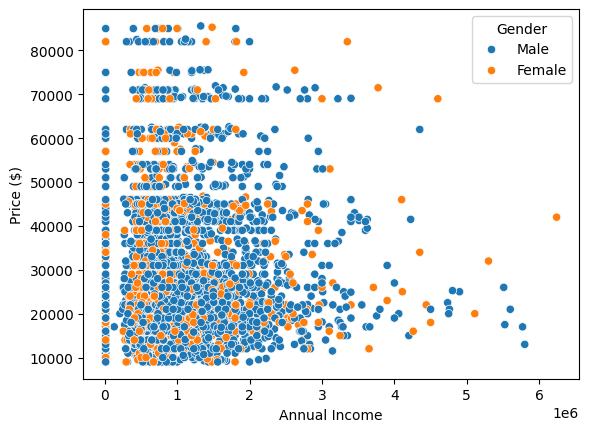

In [22]:
getattr(sns, 'scatterplot')(data=df, y="Price ($)", x="Annual Income", hue='Gender')

In [49]:

def plot_sca(df: pd.DataFrame, graph_type: str = 'scatterplot', plot_engine: str = 'seaborn', **kwargs):
    '''unviersal function for plotting scatter, countplot, boxplot and so on
        df - pandas dataframe
        graph_type - graph type (scatterplot, countplot, boxplot)
        plot_engine - type of engine supported 'seaborn'- for seaborn and 'plotly' for plotly =)
    '''

    def seaborn_plot(df: pd.DataFrame, graph_type:str = 'scatterplot', **kwargs):
        getattr(sns, graph_type)(data=df, **kwargs)


    def plotly_plot(df: pd.DataFrame, graph_type:str = 'scatterplot', **kwargs):
        getattr(px, graph_type)(df, **kwargs).show()


    engines = {'seaborn': seaborn_plot, 'plotly': plotly_plot}

    if plot_engine not in engines:
        raise(ValueError(f'{plot_engine} not permitted, only {engines.keys()} are supported'))

    # converting names for unviversal access
    plot_methods = {
        'seaborn': {
            'scatterplot' : 'scatterplot',
            'countplot' : 'countplot',
            'boxplot' : 'boxplot',
        },
        'plotly': {
            'scatterplot' : 'scatter',
            'countplot' : 'histogram',
            'boxplot' : 'box',
        }
    }

    engines.get(plot_engine)(df, graph_type = plot_methods[plot_engine][graph_type], **kwargs)


# plot_sca(df, graph_type = 'scatterplot', plot_engine = 'seaborn', y="Price ($)", x="Annual Income", hue='Gender')
# plot_sca(df, graph_type = 'countplot', plot_engine = 'seaborn', x='Transmission', hue='Gender')
# plot_sca(df, graph_type = 'boxplot', plot_engine = 'seaborn', y="Gender", x="Annual Income", orient='h')

# plot_sca(df, graph_type = 'scatter', plot_engine = 'plotly', y="Price ($)", x="Annual Income", color='Gender')
# plot_sca(df, graph_type = 'box', plot_engine = 'plotly',  y="Gender", x="Annual Income")
plot_sca(df, graph_type = 'countplot', plot_engine = 'plotly', x='Transmission', color='Gender', barmode='group')




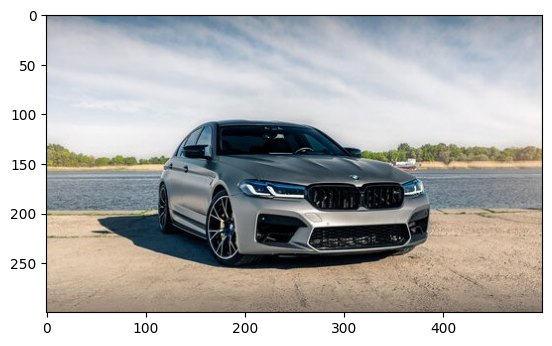

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('m5.jpg')

plt.imshow(img)

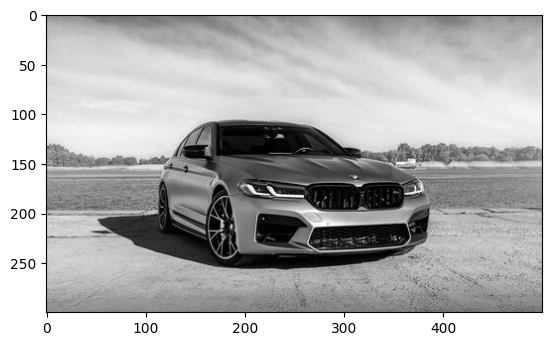

In [68]:
from PIL import Image
image = Image.open('m5.jpg').convert("L")

plt.imshow(image, cmap='gray')